### Project Feature Engineering Techniques:
Apply Feature Engineering Techniques to predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.<br>
#### Context:
Context: Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.<br>
**Attribute Information** slag ash water superplastic coarseagg fineagg age strength<br>
**cement:** measured in kg in a m3 mixture<br>
**slag:** measured in kg in a m3 mixture<br>
**ash:** measured in kg in a m3 mixture<br>
**water:** measured in kg in a m3 mixture<br>
**superplastic:** measured in kg in a m3 mixture<br>
**coarseagg:** measured in kg in a m3 mixture<br>
**fineagg:** measured in kg in a m3 mixture<br>
**age:** day (1~365)<br>
**strength:** Concrete compressive strength measured in MPa<br><br>
#### Prepared by:
Plinio Monteiro


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

from scipy import stats; from scipy.stats import zscore, norm, randint

sns.set()
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.pipeline import Pipeline
from sklearn.utils import resample

import statsmodels.api as sm

import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data as dataframe
df_concrete = pd.read_csv('concrete.csv')
df_concrete.head(5) # Print the first 5 rows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df_concrete.tail(5) # Print the last 5 rows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


### Exploratory Data Analysis (EDA)

In [5]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
#######################################################################
# Checking for presence of Missing Values   ###########################
#######################################################################
df_concrete.isnull().values.any()

False

In [7]:
#######################################################################
# Uniqueness Check ####################################################
#######################################################################
df_concrete.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [8]:
df_concrete.shape

(1030, 9)

#### Findings: 
- There is no missing value in the data set
- There are a total of 1,030 rows and 9 columns
- There is the presence of zero values depicted by the head/tail but these appears to be legitimate measures and not null indication.
- All classes are numerical types. strength is the target variable (continuous). 
- Age is a discrete class whereas rest of them are continuous.

In [9]:
df_concrete.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
###############################################################################################################
# Calculate the IQR from each column. 
# The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference 
# between the upper quartile (75th percentile) and the lower quartile (25th percentile). 
# The IQR is also a very important measure for identifying outliers and can be visualized using a boxplot.
###############################################################################################################
# from scipy.stats import iqr
print("Interquartile calculation using scipy.stats import iqr ")
print('')
for cols in df_concrete.columns:                                # Loop through all columns in the dataframe
    IQR = iqr(df_concrete[cols])
    print ('class name = ', cols, ' has an IQR = {0:.2f}'.format(IQR))
    
    
    

Interquartile calculation using scipy.stats import iqr 

class name =  cement  has an IQR = 157.62
class name =  slag  has an IQR = 142.95
class name =  ash  has an IQR = 118.30
class name =  water  has an IQR = 27.10
class name =  superplastic  has an IQR = 10.20
class name =  coarseagg  has an IQR = 97.40
class name =  fineagg  has an IQR = 93.05
class name =  age  has an IQR = 49.00
class name =  strength  has an IQR = 22.43


In [11]:
#######################################################################################
# Let's determine the degree of data skewness     #####################################
#######################################################################################
from scipy import stats


Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_concrete['cement']),stats.skew(df_concrete['slag']),
                                       stats.skew(df_concrete['ash']),
                                       stats.skew(df_concrete['water']),stats.skew(df_concrete['superplastic']),
                                       stats.skew(df_concrete['coarseagg']), stats.skew(df_concrete['fineagg']),
                                       stats.skew(df_concrete['age']), stats.skew(df_concrete['strength'])
                                      ]}, 
                        index=['cement', 'slag', 'ash', 'water', 
                               'superplastic', 'coarseagg','fineagg','age','strength'])


Skewness


,Skewness
cement,0.508739
slag,0.799550
ash,0.536571
water,0.074520
superplastic,0.905881
coarseagg,-0.040161
fineagg,-0.252641
age,3.264415
strength,0.416370


array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fineagg'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

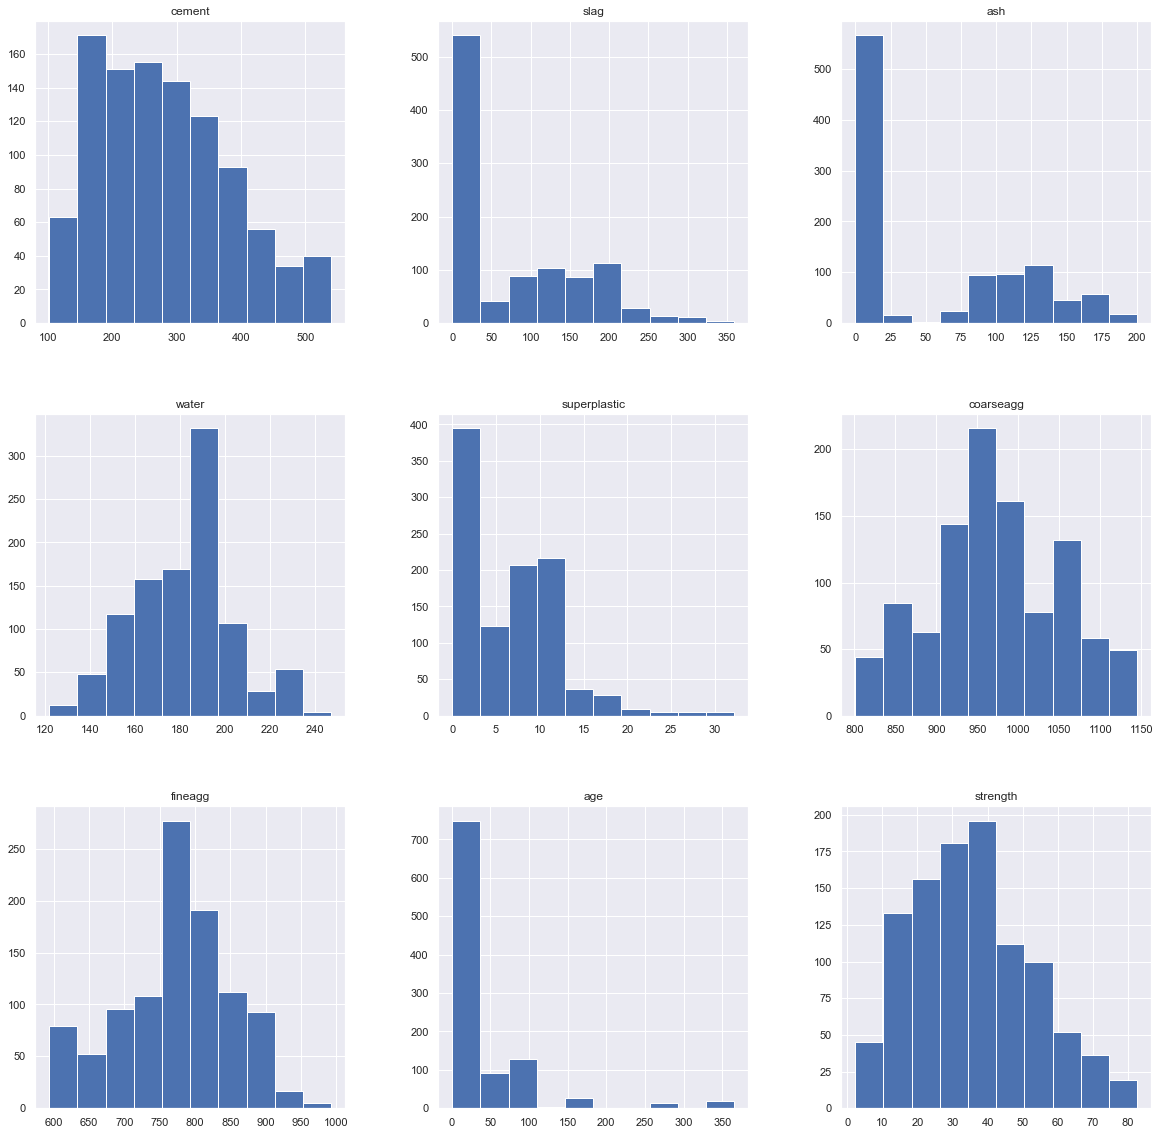

In [12]:
##########################################################################################################
# Let's use a set of Histograms to visualize the data distribution.    ###################################
##########################################################################################################
df_concrete.hist(figsize=(20, 20))

#### Findings
<b>cement:</b> Data ranges between 102 to 540, while 25th and 75th percentile is spread between 192.38 to 350. Median (272.90) is less than Mean (281.17) which means cement is moderately skewed to the right. Column has no outliers.<br> 
<b>slag:</b> Data ranges between 0 to 359.40, while 25th and 75th percentile is spread between 0 to 142.95. Median (22) is less than Mean (73.90) which means slag is moderately skewed to the right. Column has outliers.<br> 
<b>ash:</b> Data ranges between 0 to 200.10, while 25th and 75th percentile is spread between 0 to 118.30. Median (0) is less than Mean (54.19) which mean ash is moderately skewed to the right. Column has no outliers.<br> 
<b>water:</b> Data ranges between 121.80 to 247, while 25th and 75th percentile is spread between 164.90 and 192. Median (185) is greater than Mean (181.57) which means water is skewed to the left (fairly sym). Column has outliers.<br> 
<b>superplastic:</b> Data ranges between 0 to 32.20, while 25th and 75th percentile is spread between 0 to 10.20. Median (6.40) is greater than Mean (6.20) which means superplastic is moderately skewed to the left. Column has outliers.<br> 
<b>coarseagg:</b> Data ranges between 801 to 1145, while 25th and 75th percentile is spread between 932 to 1029.40. Median (968) is less than Mean (972.92) which means coarseagg is skewed to the right (fairly sym). Column has no outliers.<br> 
<b>fineagg:</b> Data ranges between 594 to 992.60, while 25th and 75th percentile is spread between 730.95 to 824. Median (779.5) is greater than Mean (773.58) which means fineagg is skewed to the left (fairly sym). Column has no outliers.<br> 
<b>age:</b> Data ranges between 1 to 365, while 25th and 75th percentile is spread between 7 to 56. Median (28) is less than Mean (45.66) which means age is highly skewed to the right. Column has no outliers.<br> 
<b>strength:</b> Data ranges between 2.33 to 82.60, while 25th and 75th percentile is spread between 23.71 to 46.14. Median (34.45) is less than Mean (35.82) which means strength is slightly skewed to the right (fairly sym). Column has no outliers.<br> <br>
Presence of zeros is a legitimate measure. It is not an indication of missing or null values.

#### Findings (Skewness Summary):
- cemement, slag, ash, superplastic are <b>moderately skew</b> (skewness between −1 and −½ or between +½ and +1)
- age is <b>highly skewed</b> (skewness < -1 or > +1)
- water, coarseagg, fineagg and strength are <b>approximately symetric distribution</b> (skeweness between −½  and +½)


#### Let's use boxplot to visualize Outliers

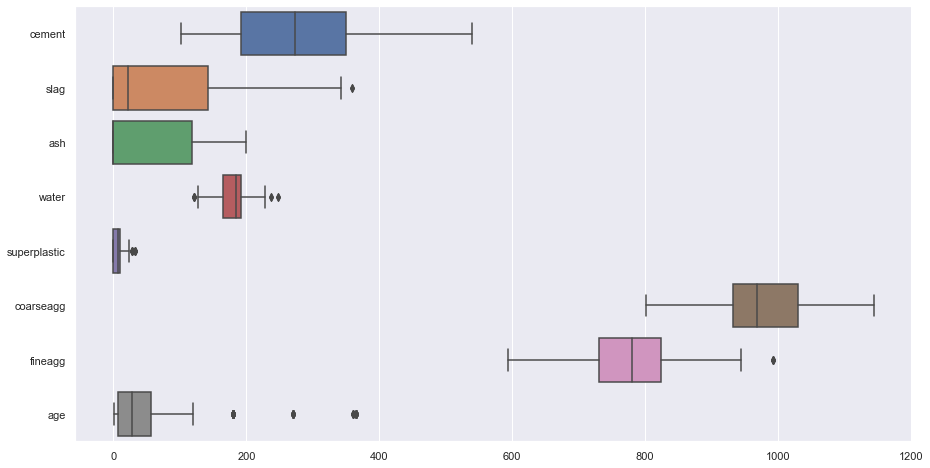

In [13]:
fig = plt.figure(figsize = (15, 8))
ax = sns.boxplot(data = df_concrete.iloc[:, 0:-1], orient = 'h')

In [14]:
def EDA_Plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 8))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'orange')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'orange', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(df[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(df[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'green', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()



#### Le'ts zoom in a bit more on on the columns and Outliers (if any)

========================================= COLUMN NAME =  cement  =============================================

IQR Lower boundary = -44.06  IQR higher Boundary = 586.44

Number of rows with outliers: 0


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


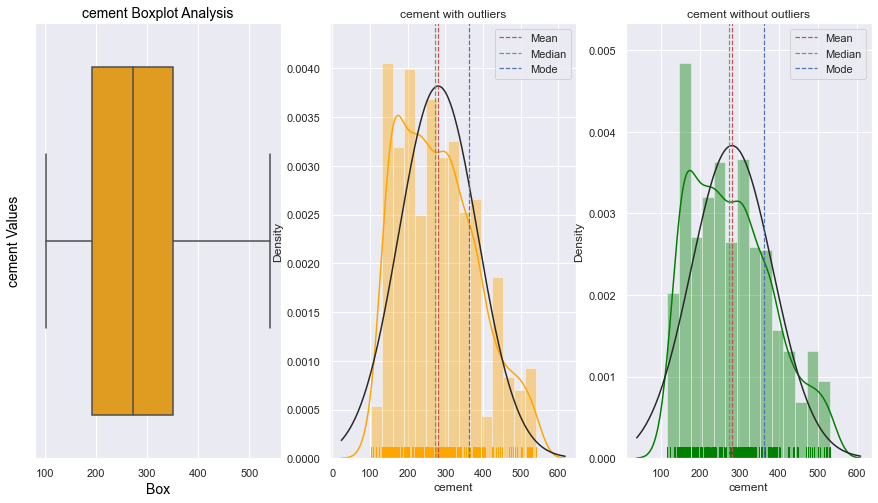

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


========================================= COLUMN NAME =  slag  =============================================

IQR Lower boundary = -214.42  IQR higher Boundary = 357.38

Number of rows with outliers: 2


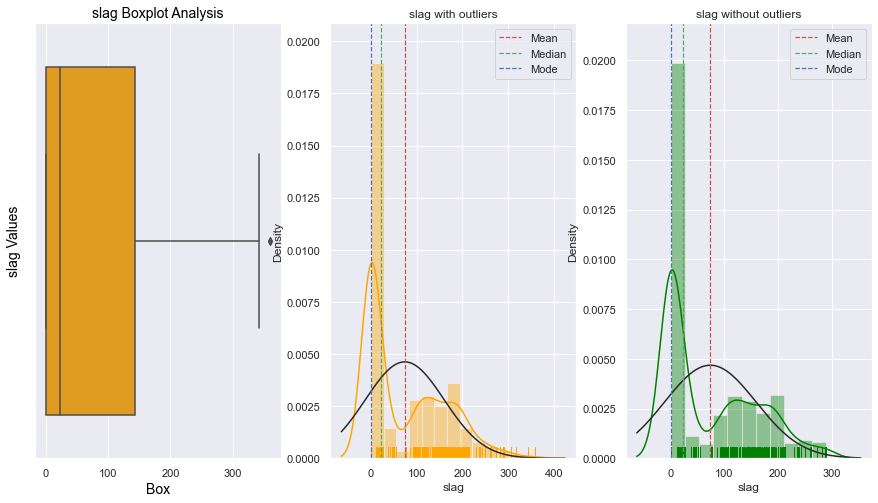

========================================= COLUMN NAME =  ash  =============================================

IQR Lower boundary = -177.45  IQR higher Boundary = 295.75

Number of rows with outliers: 0


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


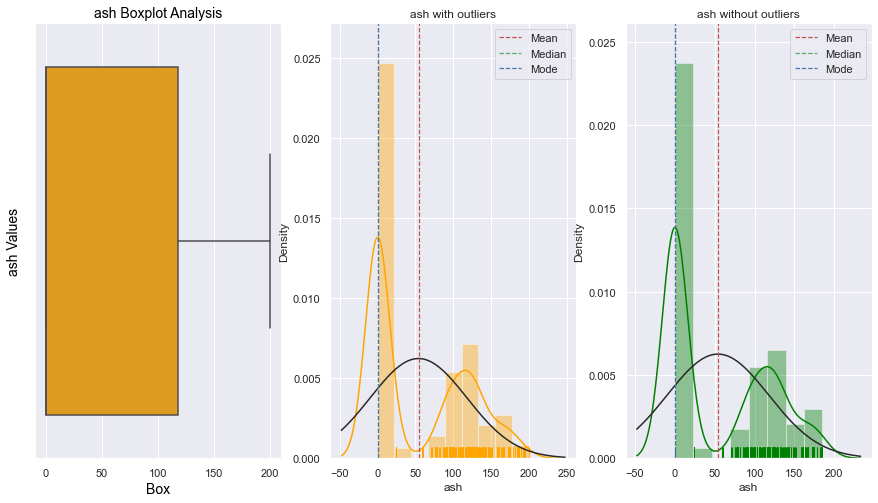

========================================= COLUMN NAME =  water  =============================================

IQR Lower boundary = 124.25  IQR higher Boundary = 232.65

Number of rows with outliers: 9


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75


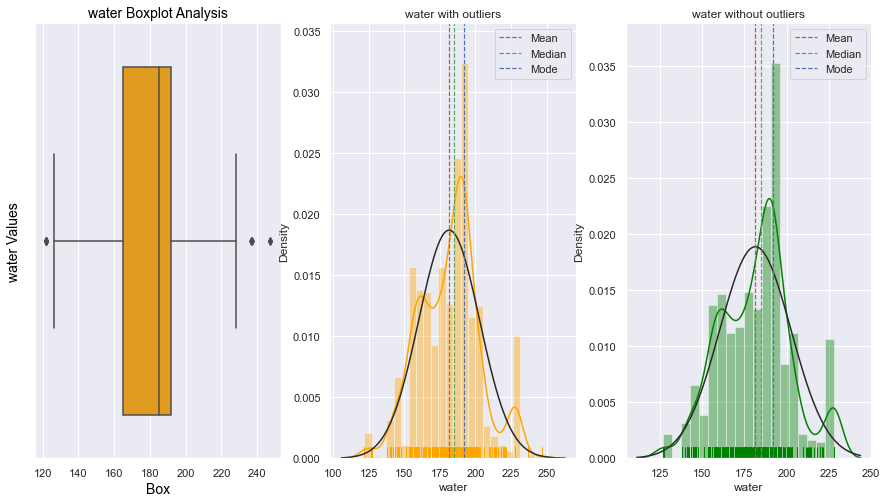

========================================= COLUMN NAME =  superplastic  =============================================

IQR Lower boundary = -15.30  IQR higher Boundary = 25.50

Number of rows with outliers: 10


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9


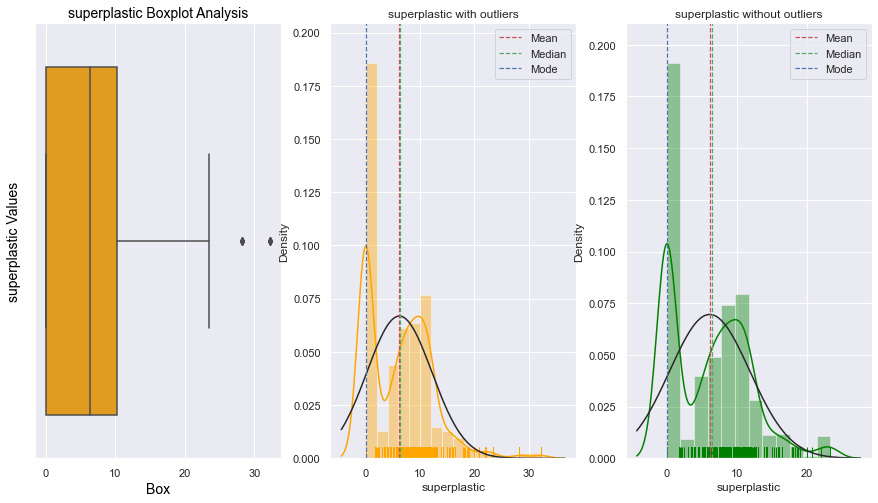

========================================= COLUMN NAME =  coarseagg  =============================================

IQR Lower boundary = 785.90  IQR higher Boundary = 1175.50

Number of rows with outliers: 0


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


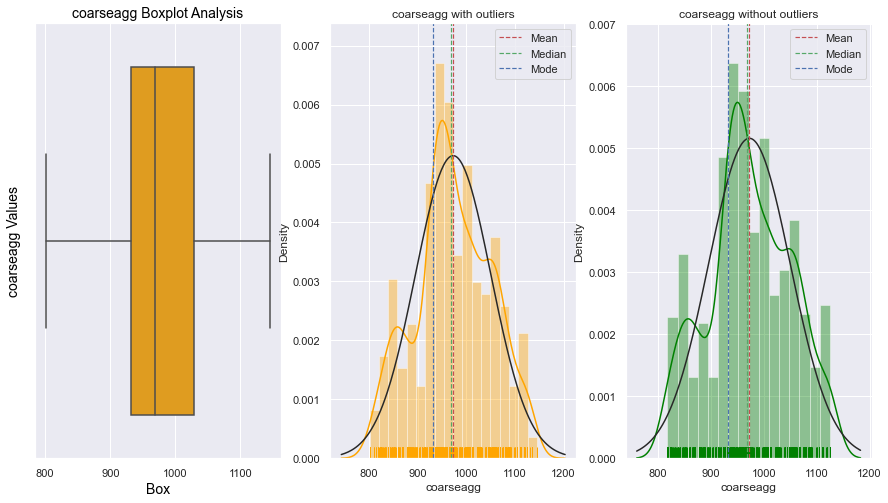

========================================= COLUMN NAME =  fineagg  =============================================

IQR Lower boundary = 591.37  IQR higher Boundary = 963.58

Number of rows with outliers: 5


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


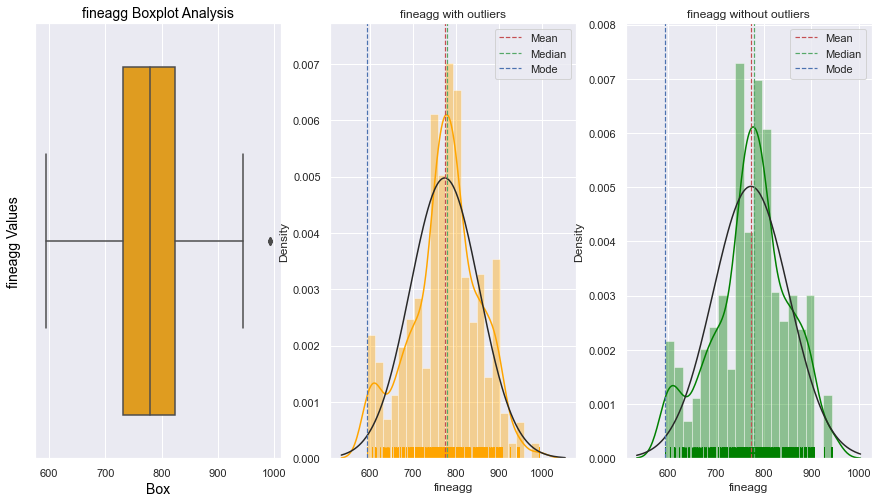

========================================= COLUMN NAME =  age  =============================================

IQR Lower boundary = -66.50  IQR higher Boundary = 129.50

Number of rows with outliers: 59


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10


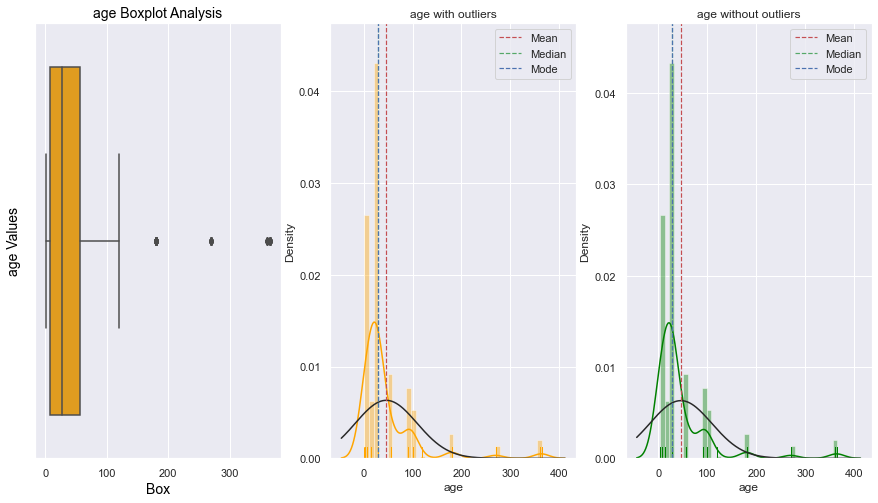

In [15]:

cols = list(df_concrete.columns)[:-1]        # Populate cols wih all the independent variables
for x in cols:
    Q3 = df_concrete[x].quantile(0.75)
    Q1 = df_concrete[x].quantile(0.25)
    IQR = Q3 - Q1
    
    print('============================================================================================================')
    print('========================================= COLUMN NAME = ', x, ' =============================================')
    print('============================================================================================================')
    print('')
    print('IQR Lower boundary = {0:.2f}'.format(Q1 - 1.5 * IQR), ' IQR higher Boundary = {0:.2f}'.format(Q3 + 1.5 * IQR))
    print('')
    print(f'Number of rows with outliers: {len(df_concrete.loc[(df_concrete[x] < (Q1 - 1.5 * IQR)) | (df_concrete[x] > (Q3 + 1.5 * IQR))])}')
    display(df_concrete.loc[(df_concrete[x] < (Q1 - 1.5 * IQR)) | (df_concrete[x] > (Q3 + 1.5 * IQR))].head())
    
    EDA_Plots(df_concrete, x)
    

#### Findings:
- Cement, coarseagg and ash have no Outliers
- slag has 2 Outliers
- water has 9 Outliers
- superplastic has 10 Outliers
- fineagg has 5 Outliers
- age has 59 Outliers

#### Let's Address the Outliers

In [16]:
print('================================== Data Set Statistics Before Addressing Outliers =============================')
df_concrete.describe().T

================================== Data Set Statistics Before Addressing Outliers =============================


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Replacing Outliers With Column Mean

In [17]:
###############################################################################################
# Replacing the Outliers with column mean.              #######################################
###############################################################################################
Outliers_cols = ['slag', 'water', 'superplastic', 'fineagg', 'age']

df_ConcreteCL = df_concrete.copy(deep = True)


for cols in Outliers_cols:
    Q3 = df_concrete[cols].quantile(0.75)
    Q1 = df_concrete[cols].quantile(0.25)
    IQR = Q3 - Q1
    Upper_Boundary = (Q3 + 1.5 * IQR)
    Lower_Boundary = (Q1 - 1.5 * IQR)
    
    df_ConcreteCL.loc[(df_ConcreteCL[cols] < Lower_Boundary) | (df_ConcreteCL[cols] > Upper_Boundary), cols] = df_ConcreteCL[cols].mean()
    

In [18]:
print('=================================== Data Set Statistics After Addressing Outliers ============================')
df_ConcreteCL.describe().T

=================================== Data Set Statistics After Addressing Outliers ============================


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.90000,350.000000,540.0
slag,1030.0,73.341448,85.354475,0.00,0.000,22.00000,142.725000,342.1
ash,1030.0,54.188350,63.997004,0.00,0.000,0.00000,118.300000,200.1
water,1030.0,181.623112,20.600807,126.60,164.900,185.00000,192.000000,228.0
superplastic,1030.0,5.971696,5.477051,0.00,0.000,6.20466,10.075000,23.4
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.00000,1029.400000,1145.0
fineagg,1030.0,772.517284,78.701767,594.00,730.950,778.90000,822.200000,945.0
age,1030.0,33.268025,27.951514,1.00,7.000,28.00000,45.662136,120.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.44500,46.135000,82.6


### Findings:
- Medians remain unchanged while mean has been impacted very slightly.

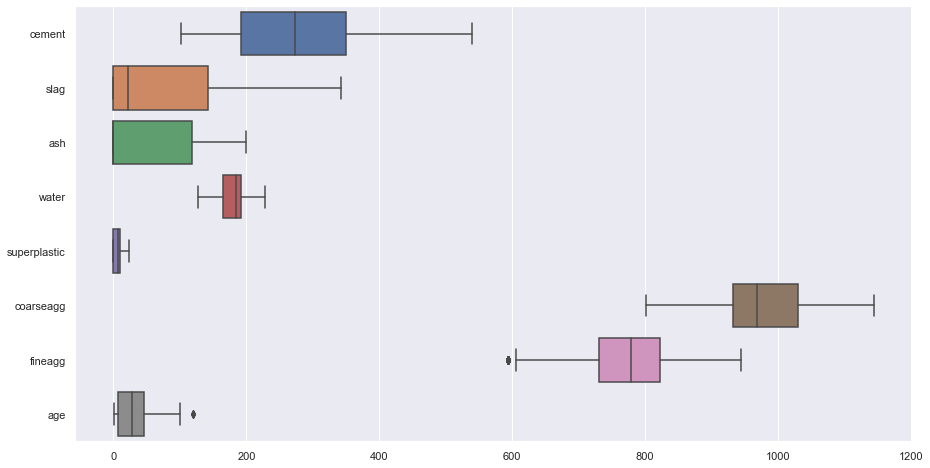

In [19]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 8))
ax = sns.boxplot(data = df_ConcreteCL.iloc[:, 0:-1], orient = 'h')

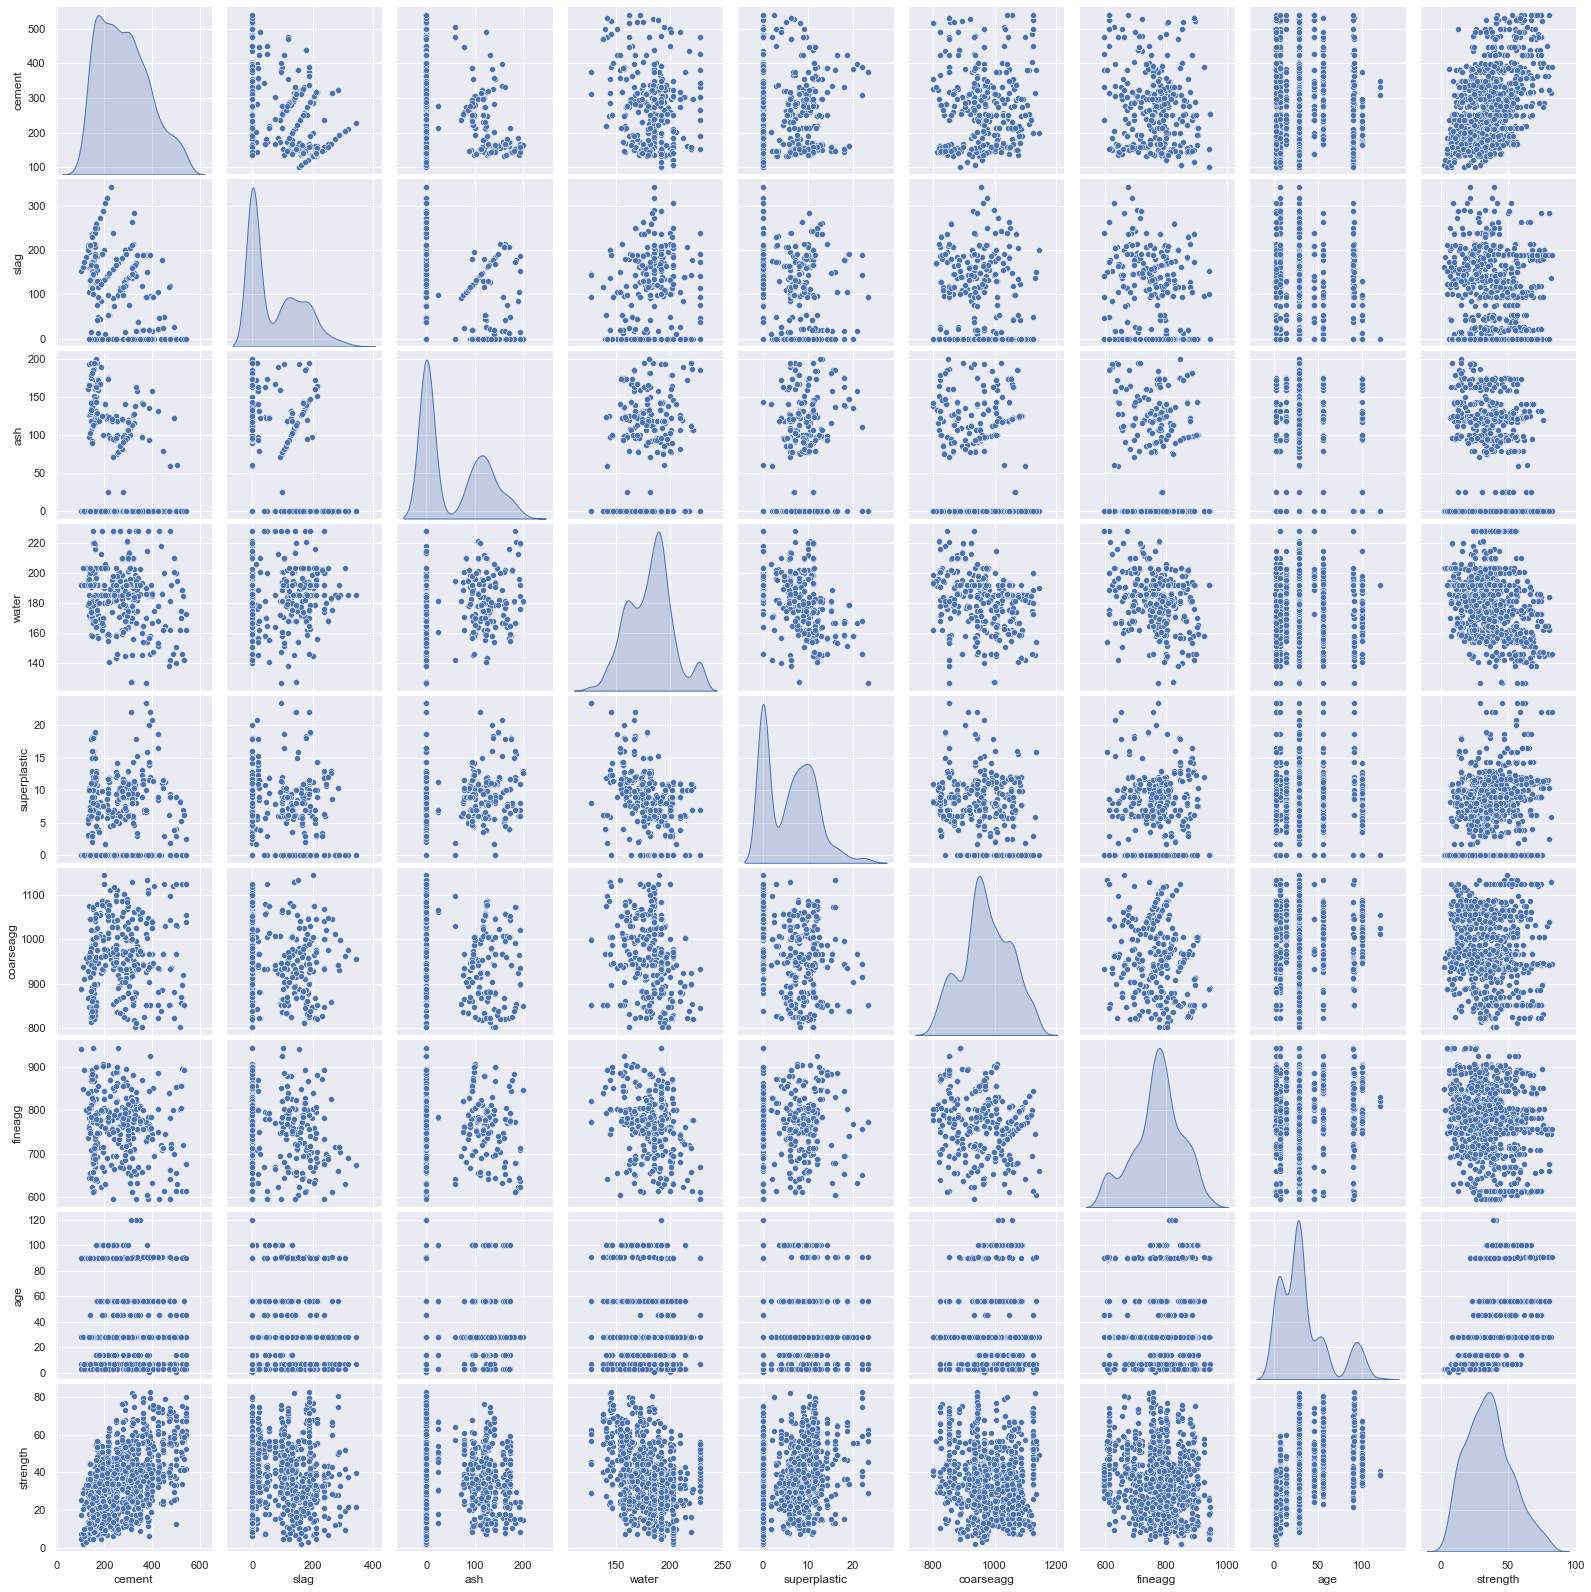

In [20]:
#################################################################################################
# Let's use pairploy to check data relationship    ##############################################
#################################################################################################
sns.pairplot(df_ConcreteCL, diag_kind = 'kde')

#### Findings:
- Pairplot comments
- Cement and strength have a linear relationship.
- Column that have bi/multimodal distributions are slag, ash and superplastic.
- Age and Cemente have strong linear relationship with strength (dependent variable).

        *** Relationship Between  cement  and strength ***


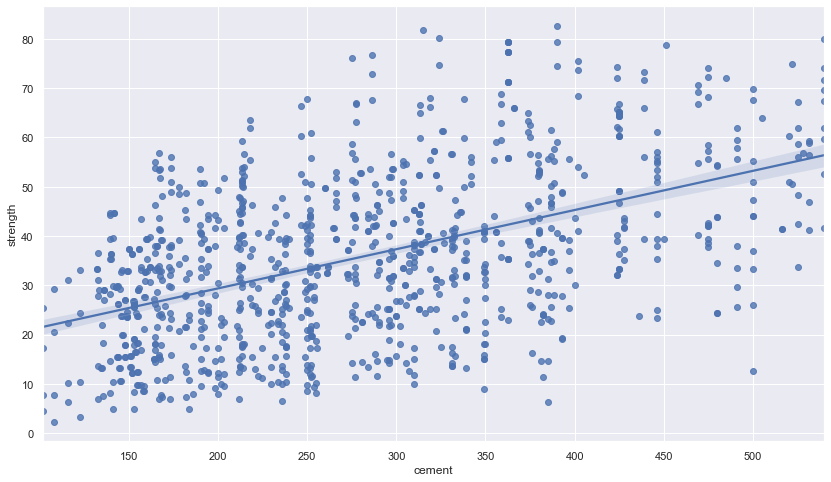

        *** Relationship Between  slag  and strength ***


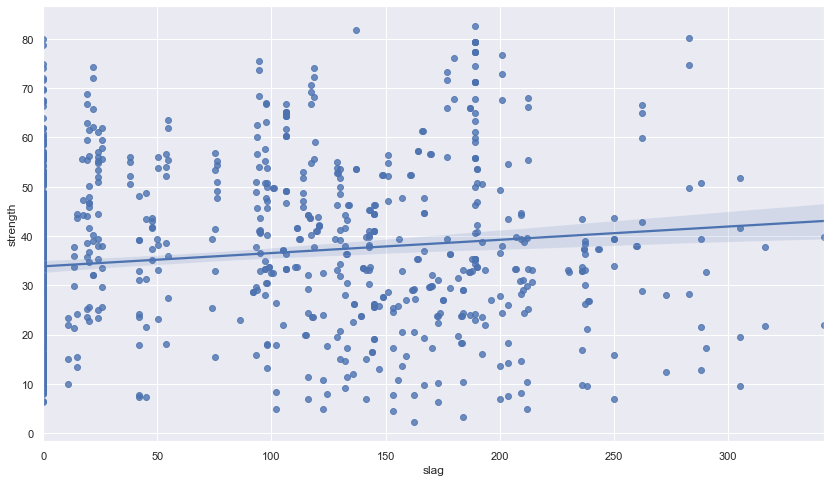

        *** Relationship Between  ash  and strength ***


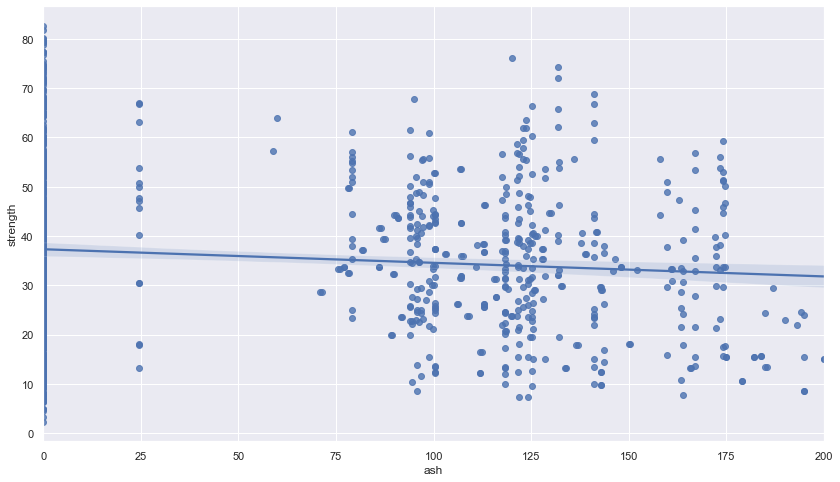

        *** Relationship Between  water  and strength ***


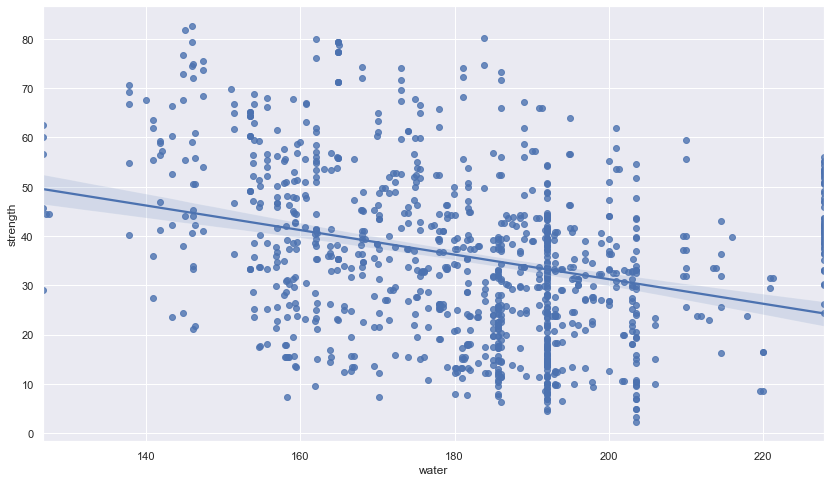

        *** Relationship Between  superplastic  and strength ***


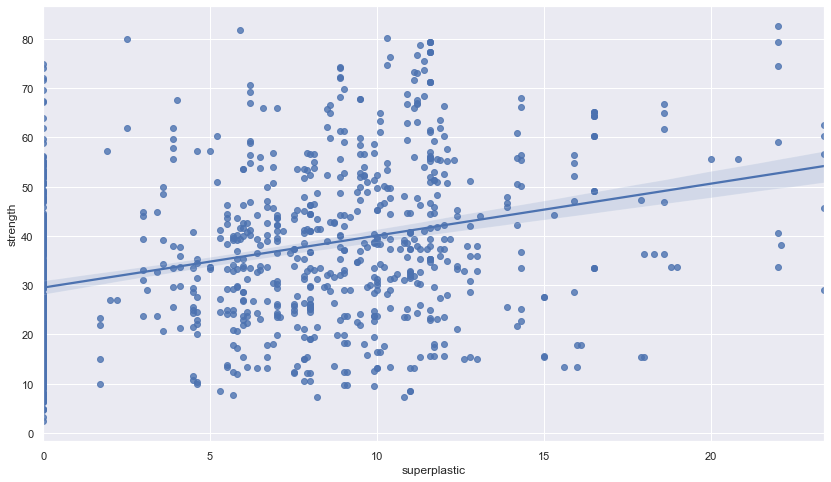

        *** Relationship Between  coarseagg  and strength ***


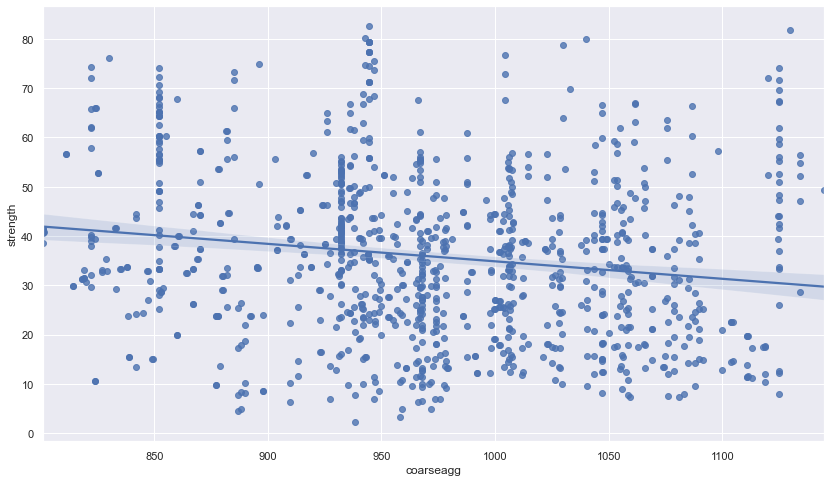

        *** Relationship Between  fineagg  and strength ***


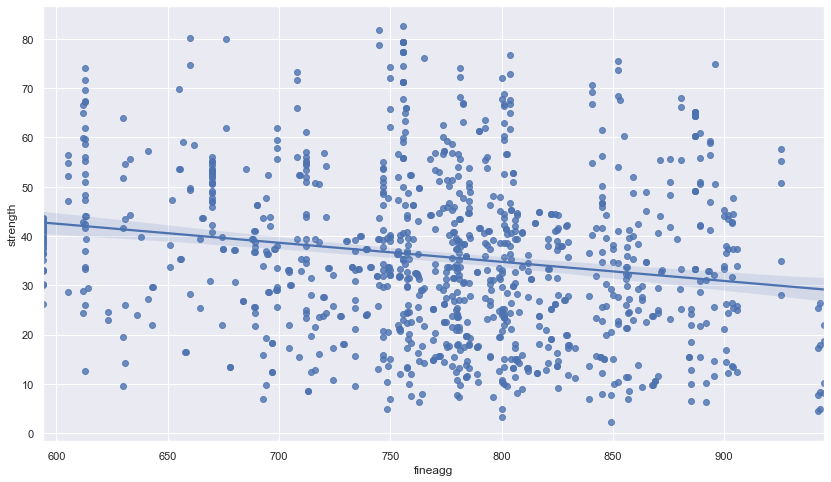

        *** Relationship Between  age  and strength ***


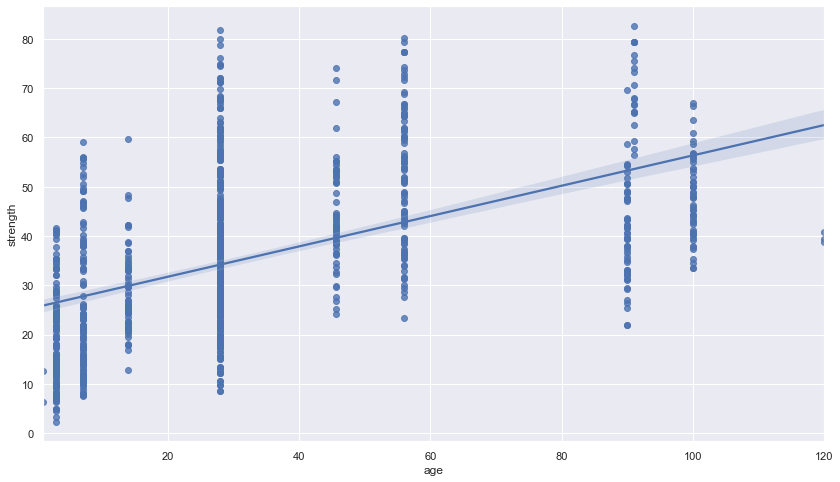

In [21]:
#####################################################################################################################
# Let's use regplot to visualize the strength of relationship between dependent (strenght) and independent variables.
#####################################################################################################################
for col in list(df_ConcreteCL.columns)[:-1]:
    fig = plt.figure(figsize = (14, 8))
    print('        *** Relationship Between ', col, ' and strength ***')
    sns.regplot(x=col, y="strength", data=df_ConcreteCL)
    plt.show()

#### Findings:
regplot comments
- Cement and strength have a linear relationship.
- Age and Cemente have strong linear relationship (noted by the regression line) with strength (dependent variable).

In [22]:
df_ConcreteCL.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275612,-0.397467,-0.090173,0.012610,-0.109349,-0.239031,-0.014159,0.497832
slag,-0.275612,1.000000,-0.321581,0.099040,0.059988,-0.284457,-0.284200,-0.035366,0.137609
ash,-0.397467,-0.321581,1.000000,-0.249885,0.447795,-0.009961,0.092040,0.026944,-0.105755
water,-0.090173,0.099040,-0.249885,1.000000,-0.657400,-0.156906,-0.424659,0.011081,-0.307042
superplastic,0.012610,0.059988,0.447795,-0.657400,1.000000,-0.223969,0.155018,0.022124,0.345839
coarseagg,-0.109349,-0.284457,-0.009961,-0.156906,-0.223969,1.000000,-0.160812,0.017592,-0.164935
fineagg,-0.239031,-0.284200,0.092040,-0.424659,0.155018,-0.160812,1.000000,0.020552,-0.182517
age,-0.014159,-0.035366,0.026944,0.011081,0.022124,0.017592,0.020552,1.000000,0.515301
strength,0.497832,0.137609,-0.105755,-0.307042,0.345839,-0.164935,-0.182517,0.515301,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Attributes')

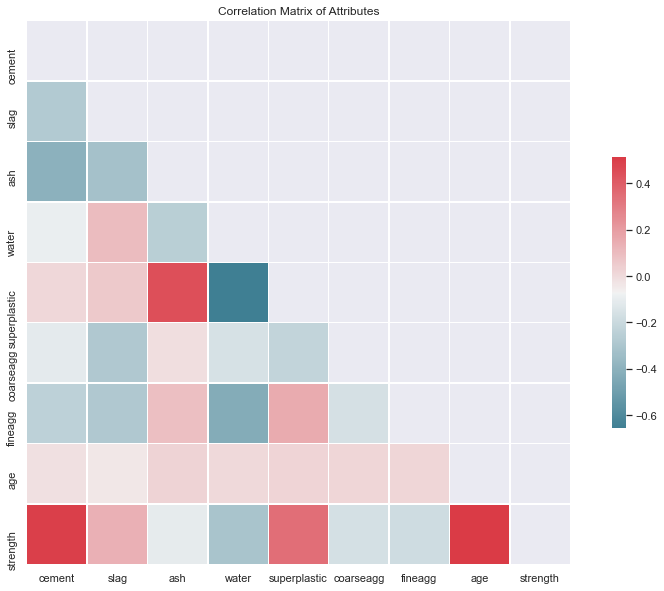

In [23]:
####################################################################################
# Let's get a correlation Matrix of all attributes.  
####################################################################################
correlation = df_ConcreteCL.corr()

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlation, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
ax.set_title('Correlation Matrix of Attributes')

In [24]:
#####################################################################
# Select the correlations where coefficient of correlation is > 0.4
#####################################################################
sort = correlation.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.4) & (sort < 1)]

water         superplastic    0.657400
superplastic  water           0.657400
strength      age             0.515301
age           strength        0.515301
cement        strength        0.497832
strength      cement          0.497832
ash           superplastic    0.447795
superplastic  ash             0.447795
water         fineagg         0.424659
fineagg       water           0.424659
dtype: float64

In [25]:
#################################################################################################
# Coefficient of Correlation between independent variables and Target variable.
#################################################################################################
Corrx = []
Independent = df_ConcreteCL.drop('strength', axis = 1).columns

for var in Independent:
    Corrx.append((df_ConcreteCL['strength'].corr(df_ConcreteCL[var])))

display(pd.DataFrame([Independent, Corrx], index = ['Variable', 'Coefficient']).T.\
        sort_values('Coefficient', ascending = False))

,Variable,Coefficient
7,age,0.515301
0,cement,0.497832
4,superplastic,0.345839
1,slag,0.137609
2,ash,-0.105755
5,coarseagg,-0.164935
6,fineagg,-0.182517
3,water,-0.307042


### Insights:
- Dependent Variable 'strength' has a positive correlation with age, cement, superplastic and slag.
- Dependent Variable strength has a negative correlation with water, fineagg, coarseagg and ash.
- Water and superplastic are highly correlated.
- I will keep all variable for building the models since they all have reasonable degree of correlation with strength

## Feature Engineering techniques
- Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms more robust.<br>
- One main reason why feature engineering is so important is that defining and/or learning higher level domain specific feature is a path towards deep learning.

### Extract a new feature for the Model

In [26]:
#############################################################################################################
# Extract new features from existing features.        #######################################################
# Let's create a new column cement/Water proportion   #######################################################
#############################################################################################################
df_ConcreteFE = df_ConcreteCL.copy(deep = True)
df_ConcreteFE['cementwater'] = df_ConcreteFE['cement'] / df_ConcreteFE['water']
df_ConcreteFE.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cementwater
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.341448,54.188350,181.623112,5.971696,972.918932,772.517284,33.268025,35.817961,1.577095
std,104.506364,85.354475,63.997004,20.600807,5.477051,77.753954,78.701767,27.951514,16.705742,0.648606
min,102.000000,0.000000,0.000000,126.600000,0.000000,801.000000,594.000000,1.000000,2.330000,0.531250
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,1.066961
50%,272.900000,22.000000,0.000000,185.000000,6.204660,968.000000,778.900000,28.000000,34.445000,1.480718
75%,350.000000,142.725000,118.300000,192.000000,10.075000,1029.400000,822.200000,45.662136,46.135000,1.875000
max,540.000000,342.100000,200.100000,228.000000,23.400000,1145.000000,945.000000,120.000000,82.600000,3.746827


In [27]:
#################################################################################################
# Coefficient of Correlation between independent variables and Target variable.
#################################################################################################
df_ConcreteFE.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cementwater
cement,1.000000,-0.275612,-0.397467,-0.090173,0.012610,-0.109349,-0.239031,-0.014159,0.497832,0.942635
slag,-0.275612,1.000000,-0.321581,0.099040,0.059988,-0.284457,-0.284200,-0.035366,0.137609,-0.245292
ash,-0.397467,-0.321581,1.000000,-0.249885,0.447795,-0.009961,0.092040,0.026944,-0.105755,-0.311316
water,-0.090173,0.099040,-0.249885,1.000000,-0.657400,-0.156906,-0.424659,0.011081,-0.307042,-0.394718
superplastic,0.012610,0.059988,0.447795,-0.657400,1.000000,-0.223969,0.155018,0.022124,0.345839,0.225043
coarseagg,-0.109349,-0.284457,-0.009961,-0.156906,-0.223969,1.000000,-0.160812,0.017592,-0.164935,-0.094536
fineagg,-0.239031,-0.284200,0.092040,-0.424659,0.155018,-0.160812,1.000000,0.020552,-0.182517,-0.078868
age,-0.014159,-0.035366,0.026944,0.011081,0.022124,0.017592,0.020552,1.000000,0.515301,-0.016657
strength,0.497832,0.137609,-0.105755,-0.307042,0.345839,-0.164935,-0.182517,0.515301,1.000000,0.560953
cementwater,0.942635,-0.245292,-0.311316,-0.394718,0.225043,-0.094536,-0.078868,-0.016657,0.560953,1.000000


        *** Relationship Between Cement / Water and strength ***


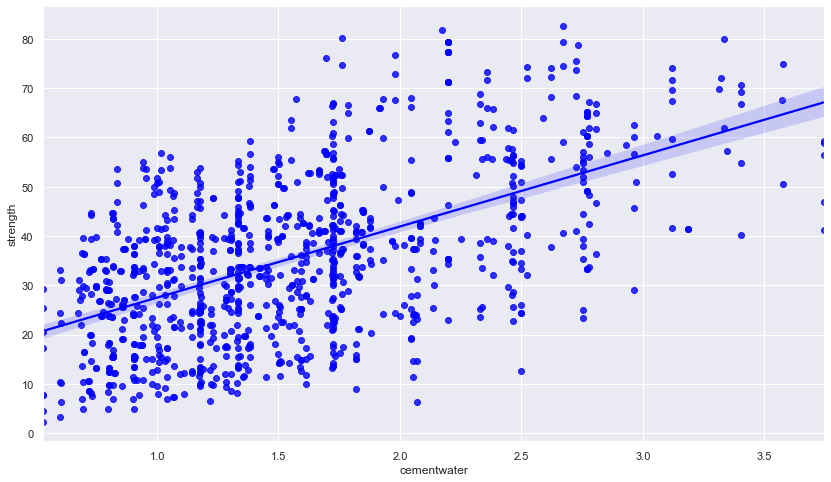

In [28]:
#####################################################################################################################
# Let's use regplot to visualize the strength of relationship between dependent (strenght) and cement / water.
#####################################################################################################################

fig = plt.figure(figsize = (14, 8))
print('        *** Relationship Between Cement / Water and strength ***')
sns.regplot(x='cementwater', y="strength", color = 'blue', data=df_ConcreteFE)
plt.show()

### Insights: 
- Extracting a new feature cement/water created a variable with the strongest correlation to the dependent variable strength.

In [29]:
#################################################################################################
# Coefficient of Correlation between independent variables and Target variable.
#################################################################################################
Corrx = []
Independent = df_ConcreteFE.drop('strength', axis = 1).columns

for var in Independent:
    Corrx.append((df_ConcreteFE['strength'].corr(df_ConcreteFE[var])))

display(pd.DataFrame([Independent, Corrx], index = ['Variable', 'Coefficient']).T.\
        sort_values('Coefficient', ascending = False))

,Variable,Coefficient
8,cementwater,0.560953
7,age,0.515301
0,cement,0.497832
4,superplastic,0.345839
1,slag,0.137609
2,ash,-0.105755
5,coarseagg,-0.164935
6,fineagg,-0.182517
3,water,-0.307042


#### Insights:
- As seen on the correlation matrix above, cement/water derived variable has the best correlation to strength.
- Let's keep all the variables for now.

In [30]:
##############################################################################################################
# Function to Populate Accuracy Scores   #####################################################################
##############################################################################################################
def CalcScore (X_train, y_train, X_test, y_test, Method, Type):
    if Type == 'Ridge':
        
        df_Results = pd.DataFrame({'Method':[Method], 'Training Score': ridge.score(X_train, y_train),
                                  'Testing Set Accuracy': ridge.score(X_test, y_test)})
    elif Type == 'Lasso':
        df_Results = pd.DataFrame({'Method':[Method], 'Training Score': lasso.score(X_train, y_train),
                                  'Testing Set Accuracy': lasso.score(X_test, y_test)})
    else:
        df_Results = pd.DataFrame({'Method':[Method], 'Training Score': regression_model.score(X_train, y_train),
                                  'Testing Set Accuracy': regression_model.score(X_test, y_test)})
        
          
    

    df_Results = df_Results[['Method','Training Score', 'Testing Set Accuracy']]
    return df_Results

### Separated Independent and Dependent Variables

In [31]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = df_ConcreteFE.drop('strength', axis=1)
# X = df_ConcreteFE.drop('cement/water', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = df_ConcreteFE[['strength']]

In [32]:
# scale all the independent variables. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

In [33]:
#######################################################################################################
# Split the Data into train and test. Set the Random_State variable to be used in all models          #
#######################################################################################################
Random_State = 7
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=Random_State)

### Let's fit a simple linear Regression First

In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 11.641077179795822
The coefficient for slag is 5.790024344006957
The coefficient for ash is 2.0281668216418165
The coefficient for water is -4.834949505858446
The coefficient for superplastic is 1.5881508326699887
The coefficient for coarseagg is -0.7261433373015348
The coefficient for fineagg is -1.923575133827248
The coefficient for age is 8.942825745285125
The coefficient for cementwater is -1.653921993365449


In [35]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 35.81667972604448


### Let's create a regularized RIDGE model

In [36]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[11.1833188   5.76192084  2.02425447 -4.6794732   1.59696619 -0.71685981
  -1.93594197  8.9359868  -1.17367233]]


### Let's Create a regularized LASSO model and note the coefficients

In [37]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 6.77509398  5.04416608  1.40518614 -2.96792652  2.03422373 -0.474667
 -1.90260565  8.69063159  3.00028329]


### Let's compare the Scores

In [38]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
lr_accuracy = regression_model.score(X_test, y_test)
ResMetrics  = CalcScore(X_train, y_train, X_test, y_test,'Linear Non Regulated','Linear')
ResMetrics

0.7430868836394834
0.7328395937499335


,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.73284


In [39]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

ridge_accuracy = ridge.score(X_test, y_test)

ResMetricsT = CalcScore(X_train, y_train, X_test, y_test,'Ridge Regression', 'Ridge')
ResMetrics  = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

0.7430773142222602
0.732744794387308


,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.732840
0,Ridge Regression,0.743077,0.732745


In [40]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

lasso_accuracy = lasso.score(X_test, y_test)

ResMetricsT = CalcScore(X_train, y_train, X_test, y_test,'Lasso Regression', 'Lasso')
ResMetrics  = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

0.7406467056724486
0.7304142553704559


,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.732840
0,Ridge Regression,0.743077,0.732745
0,Lasso Regression,0.740647,0.730414


### Findinds:
- More or less similar results but with less complex models.
- Complexity is a function of variables and coefficients
- No major difference between the models with or without ridge or lasso.

### Let's generate polynomial models

In [41]:
###############################################################################################################
# Interaction_only = True determines that only dimensions with interactions will be created. 
# The degree determines the power (e.g. power of 2 or power of 3, etc...)
##############################################################################################################
poly = PolynomialFeatures(degree = 2, interaction_only=True)


In [42]:
#############################################################################################################
# X_poly will have all the 9 dimensions, plus all the new dimensions created.
#############################################################################################################
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=Random_State)
X_train.shape

(721, 46)

### Insights:
- The Polynomial model generated a dataset with 721 rows and 46 columns

### Fit a simple non regularized linear model on polynomial features

In [43]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-5.50715253e-15  6.70745242e+00  6.78426525e+00  2.96528793e+00
 -2.76563437e+00  1.23568417e+00 -1.08364758e+00 -1.60316858e+00
  8.67008336e+00  6.12635372e+00  8.79301521e+00  1.37355769e+01
 -9.27981480e+00  1.13451630e+01  3.67114051e+00 -2.62125203e+00
  7.81714065e+00 -2.96107607e+00  2.02241128e+00 -5.51655705e+00
 -1.92375913e+00  3.68088984e-01  2.34453238e+00  2.17361620e+00
 -1.03759883e+01 -7.79104985e+00 -5.08758240e+00  2.38081963e-01
  1.54731147e+00  1.28738320e+00 -1.48071520e+01 -6.52798756e+00
 -4.51312255e+00 -1.12694228e+00 -2.95674283e+00  5.17617898e+00
 -2.10637395e+00 -1.95790061e+00 -4.23399831e-01 -1.59014082e+01
  1.14784722e+00 -1.39744836e-01 -3.53762349e+00  2.54536941e-01
  2.27125341e+00 -6.92776097e+00]


In [44]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

ResMetricsT = CalcScore(X_train, y_train, X_test, y_test,'Polynomial', 'Polynomial')
ResMetrics  = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

0.8156870410158704
0.7670420632052422


,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.732840
0,Ridge Regression,0.743077,0.732745
0,Lasso Regression,0.740647,0.730414
0,Polynomial,0.815687,0.767042


In [45]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[  0.           6.57004856   6.79229011   2.90674784  -2.82704129
    1.26356409  -1.08323039  -1.5800816    8.69046773   6.09259604
    7.32077185  11.42173235  -8.51694987  10.2599847    2.66775491
   -2.57828429   7.09668622  -2.70703368   2.01654623  -4.75895836
   -1.86950542   0.3709946    2.36355645   2.13832655  -8.49721092
   -7.04499594  -5.00776376   0.24048029   1.57032723   1.3011648
  -12.15054879  -5.92884356  -4.04343401  -0.94350364  -2.66705555
    4.54813077  -1.99648126  -1.90056409  -0.38837499 -14.70045761
    1.08628621  -0.11340441  -2.4133675    0.2340945    2.42611157
   -6.16902011]]


In [46]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

ResMetricsT = CalcScore(X_train, y_train, X_test, y_test,'Ridge Polynomial', 'Ridge')
ResMetrics  = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

0.8154608574690257
0.7701929959487795


,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.732840
0,Ridge Regression,0.743077,0.732745
0,Lasso Regression,0.740647,0.730414
0,Polynomial,0.815687,0.767042
0,Ridge Polynomial,0.815461,0.770193


In [47]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  0.00000000e+00  6.76574513e+00  2.16677420e+00
 -4.99391552e-01  1.94404434e+00 -5.91215560e-01 -8.12328843e-01
  8.76259252e+00  1.25422090e+01  1.83738393e-02  0.00000000e+00
 -1.37220359e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.82298490e-01 -1.56309616e+00  6.12342959e-01 -0.00000000e+00
  0.00000000e+00  8.27326442e-03  1.93918292e+00  1.42867794e+00
  0.00000000e+00 -2.70380360e+00 -2.59293435e+00 -2.50731788e-01
  7.41759359e-01  8.86127692e-01  0.00000000e+00  4.92493490e-01
 -1.80467224e+00  0.00000000e+00 -2.56153754e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.66282043e+00
  7.48892389e-01  0.00000000e+00  2.56795722e-01 -3.30625619e-02
  0.00000000e+00  0.00000000e+00]


In [48]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

ResMetricsT = CalcScore(X_train, y_train, X_test, y_test,'Lasso Polynomial','Lasso')
ResMetrics  = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

0.7980317322439819
0.7772203036674002


,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.732840
0,Ridge Regression,0.743077,0.732745
0,Lasso Regression,0.740647,0.730414
0,Polynomial,0.815687,0.767042
0,Ridge Polynomial,0.815461,0.770193
0,Lasso Polynomial,0.798032,0.777220


In [49]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age + cementwater', data = df_ConcreteFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     325.0
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          2.35e-292
Time:                        14:53:51   Log-Likelihood:                -3664.6
No. Observations:                1030   AIC:                             7349.
Df Residuals:                    1020   BIC:                             7399.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       39.8536     21.641      1.842   

In [50]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [51]:
# under root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

7.761344235960927

In [52]:
# predict cement stregth for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

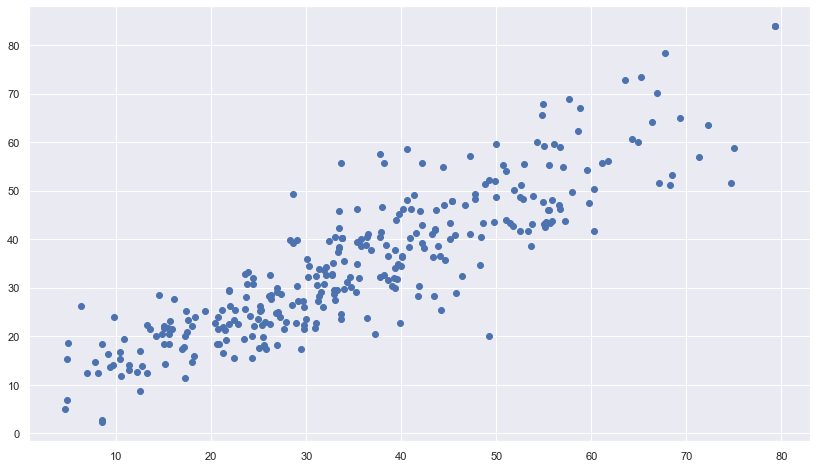

In [53]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values


fig = plt.figure(figsize = (14, 8))
plt.scatter(y_test['strength'], y_pred)

#### Insights:
- How do we improve the model? the R^2 is .74, how do we improve it
- The indpendent attributes have different units and scales of measurement 
- It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scale

In [54]:
from scipy.stats import zscore
df_Concrete_scaled  = df_ConcreteFE.apply(zscore)

In [55]:
#convert the numpy array back into a dataframe 

df_Concrete_scaled = pd.DataFrame(df_Concrete_scaled, columns=df_ConcreteFE.columns)

In [56]:
df_Concrete_scaled

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cementwater
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,-0.355018,-1.361651
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,-0.737108,-0.786889
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,-0.395144,-0.374909
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.600806,-0.633092
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,-1.049727,-1.197405
...,...,...,...,...,...,...,...,...,...,...
1025,-1.399330,-0.859675,1.747988,-0.078827,0.735845,-0.153365,0.412932,-0.188562,-1.349171,-1.275808
1026,2.394626,-0.859675,-0.847144,-1.934024,0.042555,-1.554617,1.540519,-1.083402,0.328312,3.346848
1027,-0.045645,0.500024,0.564545,-0.098253,0.534910,-1.323005,-0.053612,-0.188562,0.506781,-0.058800
1028,0.582373,-0.414256,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,0.443630,1.152381,-0.118920


In [57]:
lm = smf.ols(formula = 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age + cementwater', data = df_Concrete_scaled).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     325.0
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          2.35e-292
Time:                        14:54:39   Log-Likelihood:                -764.91
No. Observations:                1030   AIC:                             1550.
Df Residuals:                    1020   BIC:                             1599.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.082e-17      0.016  -1.31e-15   

In [58]:
ResMetrics

,Method,Training Score,Testing Set Accuracy
0,Linear Non Regulated,0.743087,0.732840
0,Ridge Regression,0.743077,0.732745
0,Lasso Regression,0.740647,0.730414
0,Polynomial,0.815687,0.767042
0,Ridge Polynomial,0.815461,0.770193
0,Lasso Polynomial,0.798032,0.777220


### Findings
- Polynomial with a degree of 2 yields a better training and testing scores
- Lasso Polynomial has a much better Testing Score and a better chance to survive in Production
- The reason is that the Lasso model yields only dimensions that are relevant
- Attempt to improve R^2 was made by using z-scores to scale all the dimensions

### Identify Important Feature Interaction

In [59]:
df_Accuracy = ResMetrics.drop(['Training Score'], axis=1)
df_Accuracy


,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220


## Creating The Models

In [60]:
X = df_Concrete_scaled.drop(['strength'], axis=1)
y = df_Concrete_scaled[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=Random_State)

In [61]:
######################################################################################
# Feature Importance Function ########################################################
######################################################################################
def FeatImportance(x_model):
    feature_importances = pd.DataFrame(x_model.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
    feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))

### Decision Tree Model

In [62]:
#######################################################################################
# Decision Tree Model   ##############################################################
######################################################################################
dt_model = DecisionTreeRegressor(random_state = Random_State)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7, splitter='best')

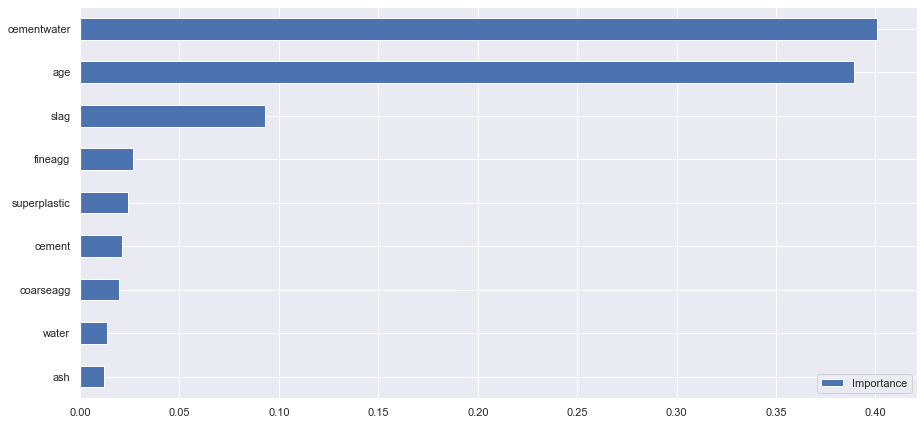

In [63]:
######################################################################################
# Feature Importance          ########################################################
######################################################################################
FeatImportance(dt_model)

In [64]:
dt_model_y_predicted = dt_model.predict(X_test)
dt_model_score_train = dt_model.score(X_train, y_train)
dt_model_score_test  = dt_model.score(X_test, y_test)
dt_model_accuracy    = metrics.r2_score(y_test, dt_model_y_predicted)
dt_model_mse         = metrics.mean_squared_error(y_test, dt_model_y_predicted)


In [65]:
print('Decision Tree Performance on Training Data : ', dt_model_score_train)
print('Decision Tree Performance on Test Data     : ', dt_model_score_test)
print('Decision Tree Accuracy                     : ', dt_model_accuracy)
print('Decision Tree Mean Squared                 : ', dt_model_mse)

Decision Tree Performance on Training Data :  0.9951739899716339
Decision Tree Performance on Test Data     :  0.8424404604240214
Decision Tree Accuracy                     :  0.8424404604240214
Decision Tree Mean Squared                 :  0.14612731203207205


In [66]:
df_AccuracyT = pd.DataFrame({'Method':['Decision Tree'], 'Testing Set Accuracy': dt_model_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440


### K-Fold Cross Validation on Decision Tree

In [67]:
Num_Folds = 20

kfold                   = KFold(n_splits=Num_Folds, random_state=Random_State)
dt_model_kfold          = cross_val_score(dt_model, X, y, cv=kfold)
dt_model_kfold_accuracy = np.mean(abs(dt_model_kfold))

In [68]:
print('Average Accuracy   : ', dt_model_kfold_accuracy)
print('Standard Deviation : ', dt_model_kfold.std())

Average Accuracy   :  0.884753243843139
Standard Deviation :  0.039365489862592085


In [69]:
df_AccuracyT = pd.DataFrame({'Method':['K-Fold Decision Tree'], 'Testing Set Accuracy': dt_model_kfold_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753


#### Insights:
- Decision Tree K-Fold CV provides a much better Accuracy Score then that of non-reguralized Decision Tree
- Sweet spot for number of folders are 20.

### Random Forest Model

In [70]:
########################################################################################
# Random Forest Model   ################################################################
########################################################################################
rf_Model = RandomForestRegressor(random_state = Random_State)
rf_Model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [71]:
predicted   = rf_Model.predict(X_test)
score_train = rf_Model.score(X_train, y_train)
score_test  = rf_Model.score(X_test, y_test)
accuracy    = metrics.r2_score(y_test, predicted)
mse         = metrics.mean_squared_error(y_test, predicted)

In [72]:
print('Random Forest Performance on Training Data : ', score_train)
print('Random Forest Performance on Test Data     : ', score_test)
print('Random Forest Accuracy                     : ', accuracy)
print('Random Forest Mean Squared Error           : ', mse)

Random Forest Performance on Training Data :  0.9835963508204599
Random Forest Performance on Test Data     :  0.912911488763864
Random Forest Accuracy                     :  0.9129114887638641
Random Forest Mean Squared Error           :  0.08076953061718417


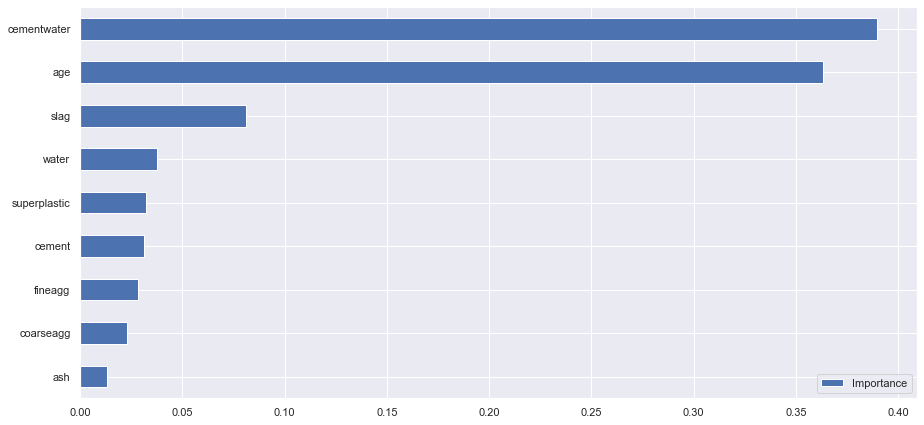

In [73]:
######################################################################################
# Feature Importance    ##############################################################
######################################################################################
FeatImportance(rf_Model)

In [74]:
df_AccuracyT = pd.DataFrame({'Method':['Random Forest'], 'Testing Set Accuracy': accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911


### K Fold Cross Validation On Random Forest

In [75]:
Folds = 10
k_folds                 = KFold(n_splits=Folds, random_state=Random_State)
model_kfold             = cross_val_score(rf_Model, X, y, cv=k_folds)
model_rf_kfold_accuracy = np.mean(abs(model_kfold))

In [76]:
print('Average Accuracy    : ', model_rf_kfold_accuracy)
print('Standard Deviation  : ', model_kfold.std())

Average Accuracy    :  0.9223952049081274
Standard Deviation  :  0.02683976038814672


In [77]:
df_AccuracyT = pd.DataFrame({'Method':['K-Fold Random Forest'], 'Testing Set Accuracy': model_rf_kfold_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


#### Findings:
- Random Forest in general, performs better than Decision Trees.
- K-fold cross validation Random Forest scores the best so far.

### Gradient Boosting Regressor:

In [78]:
gbr_model = GradientBoostingRegressor(random_state = Random_State)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
gbr_model_y_predicted = gbr_model.predict(X_test)
gbr_model_score_train = gbr_model.score(X_train, y_train)
gbr_model_score_test  = gbr_model.score(X_test, y_test)
gbr_model_accuracy    = metrics.r2_score(y_test, gbr_model_y_predicted)
gbr_model_mse         = metrics.mean_squared_error(y_test, gbr_model_y_predicted)

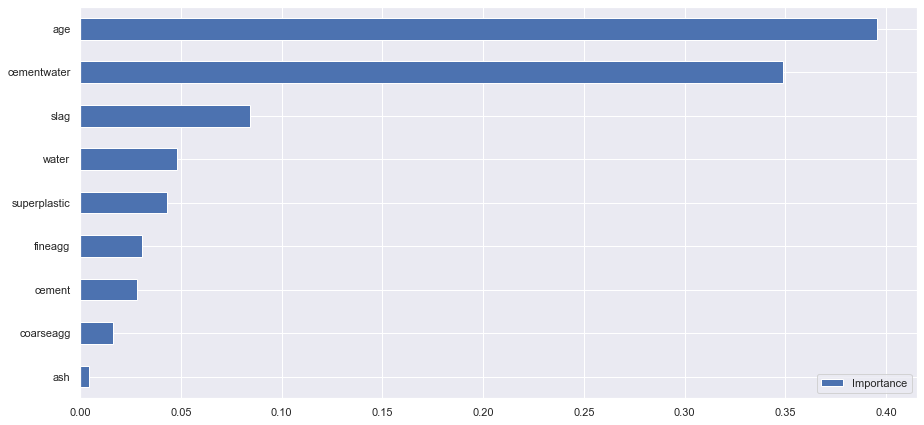

In [80]:
######################################################################################
# Feature Importance    ##############################################################
######################################################################################
FeatImportance(gbr_model)

In [81]:
print('Gradient Boosting Regressor Performance on Training Data : ', gbr_model_score_train)
print('Gradient Boosting Regressor Performance on Test Data     : ', gbr_model_score_test)
print('Gradient Boosting rRegressor Accuracy                    : ', gbr_model_accuracy)
print('Gradient Boosting Regressor Mean Squared Error           : ', gbr_model_mse)

Gradient Boosting Regressor Performance on Training Data :  0.9511200655504553
Gradient Boosting Regressor Performance on Test Data     :  0.9144628987578375
Gradient Boosting rRegressor Accuracy                    :  0.9144628987578375
Gradient Boosting Regressor Mean Squared Error           :  0.0793306880508177


In [82]:
df_AccuracyT = pd.DataFrame({'Method':['Gradient Boosting'], 'Testing Set Accuracy': gbr_model_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


#### Insights:
- Note that features importance changed for Gradient Boosting. 
- For Gradient Boosting, Age becomes a more important feature as compared to the cementwater created feature.

### K Fold Cross Validation on Gradient Boosting

In [83]:
Num_Folds = 15

kfold                    = KFold(n_splits=Num_Folds, random_state=Random_State)
gbr_model_kfold          = cross_val_score(gbr_model, X, y, cv=kfold)
gbr_model_kfold_accuracy = np.mean(abs(gbr_model_kfold))

In [84]:
print('K Fold CV Gradient Boosting Average Accuracy   : ', gbr_model_kfold_accuracy)
print('K Fold CV Gradient Boosting Standard Deviation : ', gbr_model_kfold.std())

K Fold CV Gradient Boosting Average Accuracy   :  0.9111067115193275
K Fold CV Gradient Boosting Standard Deviation :  0.029044061492439793


In [85]:
df_AccuracyT = pd.DataFrame({'Method':['K Fold Gradient Boosting'], 'Testing Set Accuracy': gbr_model_kfold_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


### Ada Boosting Regressor Model

In [86]:
abr_model = AdaBoostRegressor(random_state=Random_State)
abr_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=7)

In [87]:
abr_model_y_predicted = abr_model.predict(X_test)
abr_model_score_train = abr_model.score(X_train, y_train)
abr_model_score_test  = abr_model.score(X_test, y_test)
abr_model_accuracy    = metrics.r2_score(y_test, abr_model_y_predicted)
abr_model_mse         = metrics.mean_squared_error(y_test, abr_model_y_predicted)

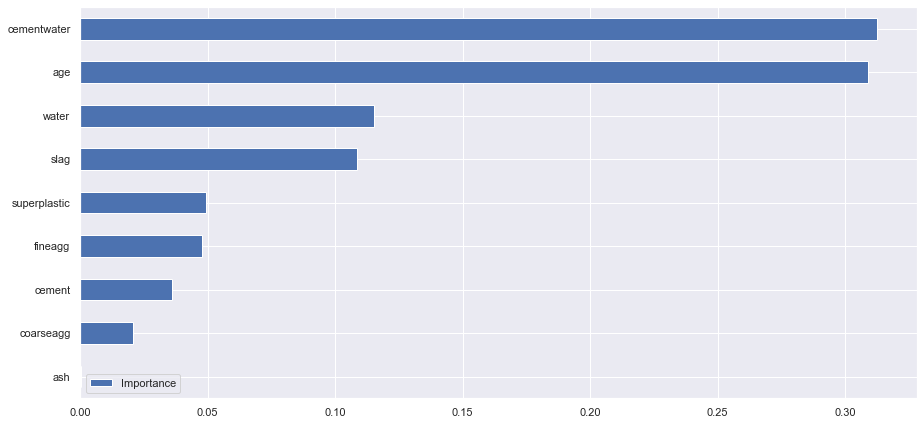

In [88]:
######################################################################################
# Feature Importance    ##############################################################
######################################################################################
FeatImportance(abr_model)

In [89]:
print('Ada Boosting Performance on Training Data : ', abr_model_score_train)
print('Ada Boosting Performance on Test Data     : ', abr_model_score_test)
print('Ada Boosting Accuracy                     : ', abr_model_accuracy)
print('Ada Boosting Mean Squared Error           : ', abr_model_mse)

Ada Boosting Performance on Training Data :  0.8360527992830136
Ada Boosting Performance on Test Data     :  0.7940416062478174
Ada Boosting Accuracy                     :  0.7940416062478174
Ada Boosting Mean Squared Error           :  0.19101443524424966


In [90]:
df_AccuracyT = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'Testing Set Accuracy': abr_model_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


#### Insights: 
- Note that feature importance for ada boosting is cementwater but slightly higher than Age.

### K-Fold Cross Validation on Ada Boosting 

In [91]:
Num_Folds = 15
kfold                    = KFold(n_splits=Num_Folds, random_state=Random_State)
abr_model_kfold          = cross_val_score(abr_model, X, y, cv=kfold)
abr_model_kfold_accuracy = np.mean(abs(abr_model_kfold))

In [92]:
print('Average Accuracy   : ', abr_model_kfold_accuracy)
print('Standard Deviation : ', abr_model_kfold.std())

Average Accuracy   :  0.7924615612589144
Standard Deviation :  0.03222398647899002


In [93]:
df_AccuracyT = pd.DataFrame({'Method':['K-Fold Ada Boosting'], 'Testing Set Accuracy': abr_model_kfold_accuracy})
df_Accuracy = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


### Bagging Regressor Model

In [94]:
Bagging_Model = BaggingRegressor(random_state=Random_State)
Bagging_Model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=7, verbose=0,
                 warm_start=False)

In [95]:
Bagging_Model_y_predicted = Bagging_Model.predict(X_test)
Bagging_Model_score_train = Bagging_Model.score(X_train, y_train)
Bagging_Model_score_test  = Bagging_Model.score(X_test, y_test)
Bagging_Model_accuracy    = metrics.r2_score(y_test, Bagging_Model_y_predicted)
Bagging_Model_mse         = metrics.mean_squared_error(y_test, Bagging_Model_y_predicted)

In [96]:
print('Bagging Regressor Performance on Training Data : ', Bagging_Model_score_train)
print('Bagging regressor Performance on Test Data     : ', Bagging_Model_score_test)
print('Bagging Regressor Accuracy                     : ', Bagging_Model_accuracy)
print('Bagging Regressor Mean Squared                 : ', Bagging_Model_mse)

Bagging Regressor Performance on Training Data :  0.9778401776066994
Bagging regressor Performance on Test Data     :  0.9038758077337087
Bagging Regressor Accuracy                     :  0.9038758077337087
Bagging Regressor Mean Squared                 :  0.08914959941447262


In [97]:
df_AccuracyT = pd.DataFrame({'Method':['Bagging Regressor'], 'Testing Set Accuracy': Bagging_Model_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


### K-Fold Cross Validation on Bagging

In [98]:
Num_Folds = 10

kfold                        = KFold(n_splits=Num_Folds, random_state=Random_State)
Bagging_Model_kfold          = cross_val_score(Bagging_Model, X, y, cv=kfold)
Bagging_Model_kfold_accuracy = np.mean(abs(Bagging_Model_kfold))

In [99]:
print('Average Accuracy    : ', Bagging_Model_kfold_accuracy)
print('Standard Deviation  : ', Bagging_Model_kfold.std())


Average Accuracy    :  0.9107065271011564
Standard Deviation  :  0.03233032122429754


In [100]:
df_AccuracyT = pd.DataFrame({'Method':['K-Fold Bagging Regressor'], 'Testing Set Accuracy': Bagging_Model_kfold_accuracy})
df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy  = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


In [101]:
##################################################################################################
# Function to plot the Scores by higher scores.                             ######################
##################################################################################################
def Accuracy_Plot(df_Accuracy):
    df_plot = df_Accuracy.sort_values(by=['Testing Set Accuracy'],ascending=False)

    plt.figure(figsize=(10,5))
    plt.title('Models Ranking')
    ax = sns.barplot(data=df_plot, x="Method", y="Testing Set Accuracy", palette="mako") 
                
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    display(df_plot)

#### Insights:
- K-Fold Bagging Cross Validation performs better than Bagging. Sweet spot for Number of Folders equal to 10. 

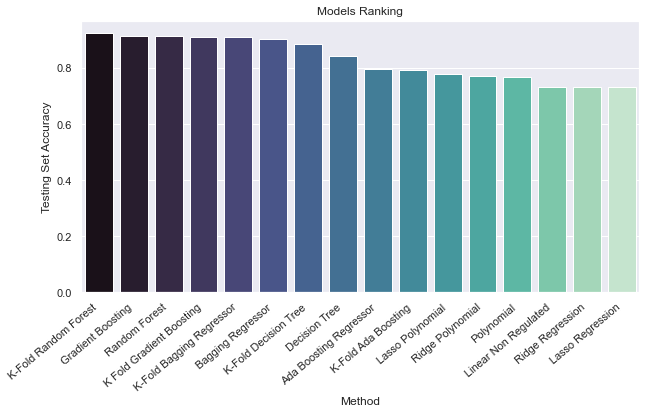

,Method,Testing Set Accuracy
0,K-Fold Random Forest,0.922395
0,Gradient Boosting,0.914463
0,Random Forest,0.912911
0,K Fold Gradient Boosting,0.911107
0,K-Fold Bagging Regressor,0.910707
0,Bagging Regressor,0.903876
0,K-Fold Decision Tree,0.884753
0,Decision Tree,0.842440
0,Ada Boosting Regressor,0.794042
0,K-Fold Ada Boosting,0.792462


In [102]:
Accuracy_Plot(df_Accuracy)

#### Insights:
- As observed above, K-Fold Random Forest has the best Accuracy Score.

### Techniques to Attempt to Gain Extra Performance

In [103]:
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor(random_state=Random_State))])

In [104]:
pipe_gbr.steps[1][1]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Applying GridSearchCV

In [105]:
param_grid={'GBR__n_estimators':[100,500,1000], 
            'GBR__learning_rate': [0.1,0.05,0.02,0.01], 
            'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 
            'GBR__max_features':[1.0,0.3,0.1] }

In [106]:
model_gs = GridSearchCV(pipe_gbr, param_grid=param_grid, cv=5, scoring='explained_variance', n_jobs=-1)
model_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('GBR',
                                        GradientBoostingRegressor(alpha=0.9,
                                                                  ccp_alpha=0.0,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                               

In [107]:
print("Grid Search Best parameter (CV score=%0.3f):" % model_gs.best_score_)
print(model_gs.best_params_)

Grid Search Best parameter (CV score=0.926):
{'GBR__learning_rate': 0.05, 'GBR__max_depth': 6, 'GBR__max_features': 0.3, 'GBR__min_samples_leaf': 9, 'GBR__n_estimators': 1000}


In [108]:
model_gs_y_pred_train = model_gs.predict(X_train)
model_gs_y_pred_test = model_gs.predict(X_test)

print('Grid Search Testing Explained Variance Score is :  {}'.format(explained_variance_score(y_test, model_gs_y_pred_test)))
print('Grid Search Testing R2 Score is                 :  {}'.format(r2_score(y_test, model_gs_y_pred_test)))
print("Test set accuracy                               :  {}".format( model_gs.score( X_test, y_test)))

Grid Search Testing Explained Variance Score is :  0.9474637165706684
Grid Search Testing R2 Score is                 :  0.9469179131611313
Test set accuracy                               :  0.9474637165706684


In [109]:
df_AccuracyT = pd.DataFrame({'Method':['GridSearchCV GradientBoosting'], 'Testing Set Accuracy': model_gs.score( X_test, y_test)})
df_Accuracy = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy = df_Accuracy[['Method', 'Testing Set Accuracy']]
df_Accuracy

,Method,Testing Set Accuracy
0,Linear Non Regulated,0.732840
0,Ridge Regression,0.732745
0,Lasso Regression,0.730414
0,Polynomial,0.767042
0,Ridge Polynomial,0.770193
0,Lasso Polynomial,0.777220
0,Decision Tree,0.842440
0,K-Fold Decision Tree,0.884753
0,Random Forest,0.912911
0,K-Fold Random Forest,0.922395


### Applying Randomized Search Cross Validation

In [110]:
param_random={'GBR__n_estimators':[100,500,1000], 
              'GBR__learning_rate': [0.1,0.05,0.02,0.01], 
              'GBR__max_depth':[4,6], 
              'GBR__min_samples_leaf':[3,5,9,17], 
              'GBR__max_features':[1.0,0.3,0.1] }

In [111]:
model_rs = RandomizedSearchCV(estimator=pipe_gbr, param_distributions=param_random, n_iter=5, 
                              cv=5, scoring='explained_variance', n_jobs=-1)
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              RobustScaler(copy=True,
                                                           quantile_range=(25.0,
                                                                           75.0),
                                                           with_centering=True,
                                                           with_scaling=True)),
                                             ('GBR',
                                              GradientBoostingRegressor(alpha=0.9,
                                                                        ccp_alpha=0.0,
                                                                        criterion='friedman_mse',
                                                                        init=None,
                                                      

In [112]:
print("Best parameter (CV score=%0.3f):" % model_rs.best_score_)
print(model_rs.best_params_)

Best parameter (CV score=0.916):
{'GBR__n_estimators': 1000, 'GBR__min_samples_leaf': 3, 'GBR__max_features': 1.0, 'GBR__max_depth': 4, 'GBR__learning_rate': 0.02}


In [113]:
model_rs_y_pred_train = model_rs.predict(X_train)
model_rs_y_pred_test = model_rs.predict(X_test)

print('Randomized Search Testing Explained Variance Score is :  {}'.format(explained_variance_score(y_test, model_rs_y_pred_test)))
print('Randomized Search Testing R2 Score is                 :  {}'.format(r2_score(y_test, model_rs_y_pred_test)))
print("Test set accuracy                                     :  {}". format( model_rs.score( X_test, y_test)))

Randomized Search Testing Explained Variance Score is :  0.9362159332523154
Randomized Search Testing R2 Score is                 :  0.9354134984767888
Test set accuracy                                     :  0.9362159332523154


In [114]:
df_AccuracyT = pd.DataFrame({'Method':['RandomizedSearchCV GradientBoosting'], 'Testing Set Accuracy': model_rs.score( X_test, y_test)})
df_Accuracy = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy = df_Accuracy[['Method', 'Testing Set Accuracy']]

### Bootstrapping Confidence Level

In [116]:

n_iterations = 500 # Number of bootstrap samples to create
df_Boot = df_Concrete_scaled[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','cementwater','strength']]
values = df_Boot.values
n_size = int(len(df_Boot * 1)) # size of a bootstrap sample
             
# run bootstrap
stats = list() # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples = n_size) # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) # picking rest of the data not considered in sample
    # fit model
    gb_reg_grid = GradientBoostingRegressor(random_state = Random_State)
    gb_reg_grid.fit(train[:, :-1], train[:, -1]) # fit against independent variables and corresponding target values

    # evaluate model
    predictions = gb_reg_grid.predict(test[:, :-1]) # predict based on independent variables in the test data
    score = r2_score(test[:, -1], predictions)
    stats.append(score)

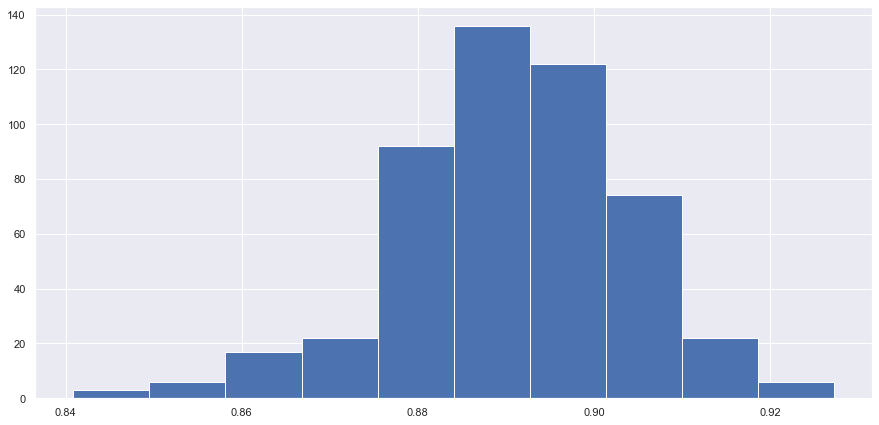

95.0 confidence interval 86.1% and 91.4%


In [117]:
# plot scores
plt.figure(figsize = (15, 7.2))
plt.hist(stats); plt.show()

# confidence intervals
alpha = 0.95 # for 95% confidence 
p = ((1.0 - alpha) / 2.0) * 100 # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  

p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Conclusion

This Project starts by performing an in-depth Exploration Data Analysis (EDA). The data set was analyzed and determined that there is no missing values present. Data set contain a total of 1,030 rows and 9 columns. All classes are numerical types and strength is the target variable. Uniqueness of the classes/variables were also analyzed.<br><br>
It was also determined that cement, slag, ash and superplastic are moderately skewed and age highly skewed. Water, coarseagg, fineagg and strength are approximately symmetric distributions.<br><br>
This analysis then identified Outliers based on the IQR. The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).  Cement, coarsegg and ash have no Outliers. While slag, water, superplastic, fineagg and age contained Outliers. The Outliers for these variables were replaced with the mean of the given column. <br><br>
A correlation matrix was created and determined that age, cement and superplastic have a good positive Coefficient of Correlation with the target variable strength. While water has a reasonable negative correlation with strength. <br><br>
In the Feature engineering stage, it was determined that extracting a new variable (feature) could strength this model further. **A new feature called cementwater (Cement / Water) was created**. This created variable has a very good impact on the models and presented the strongest correlation to the target variable. I decided to keep this feature for modeling purpose. Methods such as model based feature importance, correlation matrix and regression plot was used. <br> <br>
Used cross validation method to compare linear and non-linear/tree models on training and testing data. Three linear regressions **(Linear, Lasso and Ridge)**. Polynomial regression **(Poly, Lasso and Ridge)** was also implemented. Models such as **Decision Tree**, **Random Forest**, **Ada Boosting**, **Bagging** and **Gradient Boosting** were created. **K-Fold Ada Boosting**, **Bagging**, **Gradient Bosting** and **Random Forest** were also implemented. <br><br>
In order to squeeze additional performance, **Grid Search Cross Validation Gradient Boosting** and **Randomized Search Cross validation Gradient Boosting** were implemented. **Grid Search yielded the best testing accuracy with 0.947**. <br><br>
Overall, eight different models yielded a testing set score above .90. See list below:<br>

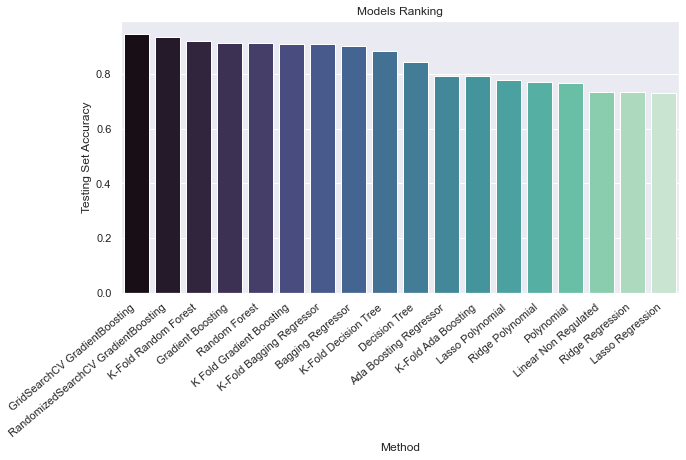

,Method,Testing Set Accuracy
0,GridSearchCV GradientBoosting,0.947464
0,RandomizedSearchCV GradientBoosting,0.936216
0,K-Fold Random Forest,0.922395
0,Gradient Boosting,0.914463
0,Random Forest,0.912911
0,K Fold Gradient Boosting,0.911107
0,K-Fold Bagging Regressor,0.910707
0,Bagging Regressor,0.903876
0,K-Fold Decision Tree,0.884753
0,Decision Tree,0.842440


In [118]:
Accuracy_Plot(df_Accuracy)

Finally, Bootstrapping method to calculate confidence intervals for Gradient Boost Regressor was utilized. It was found with **95%** confidence that **R^2** score will be between **86.1%** and **91.4%** for Gradient Boost Regressor.